# Starter Code for CS5229_2021 Term Project


## Setup and necessary Libraries
For reproducing Figure 1 of the JellyFish paper, we are going to use the following libraries:
1. [networkX](https://networkx.org/) for implementing the construction algorithm of JellyFish.
2. [random](https://docs.python.org/3/library/random.html) also for implementing the construction algorithm of JellyFish.
3. [fnss](http://fnss.github.io/) to get a ready-made constructed fat tree topology.
4. [matplotlib](https://matplotlib.org/) for drawing the graph topologies in Figure 1(a) and 1(b).

We recommend you use a Python virtual environment using a package management system like [miniconda](https://docs.conda.io/en/latest/miniconda.html) so that you can get the latest version of Python3 (3.9.7) irrespective of your local platform. Also, within your Python virtual environment, using `pip` you could get the latest versions of `networkx` (2.6.3) and `fnss` (0.9.1). You can also use `pip` to get the latest version of `mininet` (2.3.0) for part 3 of the project.

## Building Fat Tree Topology Graph

The following function is given to you to readily build a Fat Tree topology graph for a given parameter `k`.

In [6]:
import fnss

def build_fattree_graph(k):
    """
    Uses the fnss library to build a fat tree topology with k-port switches
    
    Parameters
    ----------
    k: int
      Number of ports per fat tree switch
      
    Returns
    -------
    fnss.DatacenterTopology
    """
    return fnss.fat_tree_topology(k)

## Building a Complete Graph

The following function is given to you to readily build a complete graph with `n` nodes.

In [7]:
import networkx as nx

def build_complete_graph(n):
    """
    Use the networkX library to build a complete graph
    
    Parameters
    ----------
    n: int
      Number of nodes in the graph
      
    Returns
    -------
    networkx.Graph
      Complete graph with n nodes
    """
    return nx.complete_graph(n)

## Building JellyFish Topology Graph

You would complete the following function template to build a JellyFish topology graph and submit on Coursemology. Ideally, you should not require any library other than `networkx` and `random`. This function would return a `networkx.Graph` object. The following function template is also provided on Coursemology for your team's submission. We have also provided some basic tests on Coursemology to help you do some *basic* checks of your implementation. Note that passing the test cases on Coursemology does **NOT** guarantee that your implementation is fully correct.

In [8]:
import networkx as nx
import random

def build_jellyfish_graph(num_racks, switch_degree, num_hosts_per_rack):
    """
    Uses the networkx library to build a JellyFish topology with given parameters
    
    Parameters
    ----------
    num_racks: int
      Total number of racks. Also, equivalent to the number of switches
      Called "N" in the JellyFish paper
    
    switch_degree: int
      Total number of ports per switch
      Called "k" in the JellyFish paper
      
    num_hosts_per_rack: int
      Total number of hosts (servers) per rack
      Called "(k - r)" in the JellyFish paper
      
    Returns
    -------
    networkx.Graph
      A JellyFish topology graph. Each node is tagged with an attribute called 'type'. 
      Possible values for 'type' are 'host' or 'switch'.
    """
    # Please tag your nodes like following
    # graph = nx.Graph()
    # graph.add_node('s1', type='switch')
    # graph.add_node('h1', type='host')
    pass

## Drawing the Topology Graphs

We are providing the following helper function which would help you to draw Figure 1(a) and Figure 1(b) of the JellyFish paper (without the concentric circles).

In [9]:
import matplotlib.pyplot as plt

def draw_topo_graph(topo_graph, outfile):
    """
    Uses matplotlib to draw the topology graph to the outfile. Uses different
    colors for the nodes if nodes have the attribute 'type' set to either
    'switch' or 'host'.
    
    Parameters
    ----------
    topo_graph: fnss.DatacenterTopology or networkx.Graph
      Input topology graph. Should be an object of type networkx.Graph OR fnss.DatacenterTopology
    outfile: string
      Path along with filename and extension to output the topology graph drawing
      
    Returns
    -------
    outfile: jpg, png, svg or pdf file depending on the file extension
      Draws the graph to the outfile.
    """

    switch_color = '#800000'
    host_color = '#808080'

    color_map = []
    for node,attributes in topo_graph.nodes.data():
        node_type = attributes.get('type')
        if node_type == 'switch':
            color_map.append(switch_color)
        elif node_type == 'host':
            color_map.append(host_color)

    if (len(color_map) > 0):
        nx.draw(topo_graph, node_color = color_map)   
    else:
        nx.draw(topo_graph)
    
    plt.savefig(outfile)


The following code demonstrates the usage of the helper function:

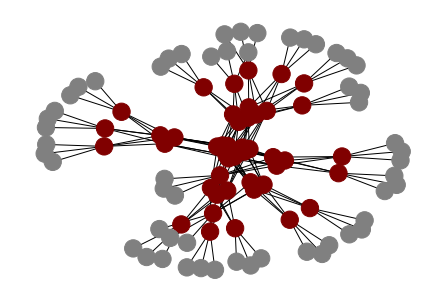

In [10]:
fat_tree_6 = build_fattree_graph(6)
draw_topo_graph(fat_tree_6, './fat_tree_6.png')